In [2]:
import os
import sys
!{sys.executable} -m pip install tensorflow pandas numpy sklearn imread resize 
import tensorflow as tf

!{sys.executable} -m pip install pandas numpy sklearn imread #  resize
print (tf.__version__)
from platform import python_version

print(python_version())


  Using cached resize-0.1.0-py3-none-any.whl
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached Pillow-5.3.0.tar.gz (15.6 MB)
  Preparing metadata (setup.py) ... done
  ERROR: Command errored out with exit status 1:
   command: /home/jordi/TFM/TFM/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-bhrwcdnq/pillow_ceb28d57055d439d9aa47a3881f4d940/setup.py'"'"'; __file__='"'"'/tmp/pip-install-bhrwcdnq/pillow_ceb28d57055d439d9aa47a3881f4d940/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-vy08vq71
       cwd: /tmp/pip-install-bhrwcdnq/pillow_ceb28d57055d439d9aa47a3881f4d940/
  Complete output (174 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  c

Failed to build Pillow
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.2.0
    Uninstalling Pillow-7.2.0:
      Successfully uninstalled Pillow-7.2.0
    Running setup.py install for Pillow ... error
    ERROR: Command errored out with exit status 1:
     command: /home/jordi/TFM/TFM/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-bhrwcdnq/pillow_ceb28d57055d439d9aa47a3881f4d940/setup.py'"'"'; __file__='"'"'/tmp/pip-install-bhrwcdnq/pillow_ceb28d57055d439d9aa47a3881f4d940/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-2zp04jko/install-record.txt --single-version-externally-managed --compile --install-headers /home/jordi/TFM/TFM/include/site/python3.8/Pillow
  

2.6.0
3.8.10


In [3]:
# Obtenemos lista de nombres de ficheros de secuencias ya pasadas letras a numérico borra ficheros vacíos
!pip install pandas

import pandas as pd
import numpy as np
import os
import shutil

pathDataset = os.path.join("./dataset")
pathTestDataset = os.path.join("./testDataset")
nombresDeFicheros = os.walk(pathDataset)

indicesZero=list()
pathConAlu = os.path.join(pathDataset,"ConAlu")
pathSinAlu = os.path.join(pathDataset,"SinAlu")

FicherosEnConAlu = os.listdir(pathConAlu)
# eliminamos ficheros vacíos
for fichero in FicherosEnConAlu:
    
    if 'No' in fichero:
 #       print(fichero)
        shutil.move(pathConAlu+'/'+fichero,pathSinAlu+'/'+fichero )
        

## Crear Secuencias de Test 

Serán las secuencias de los cromosomas 16 al 19. Estos Cromosomas suponen un ~10% de las bases totales del genoma humano.

In [4]:
pathTestDataset = os.path.join("./testDataset")
pathTestConAlu = os.path.join(pathTestDataset,"ConAlu")
pathTestSinAlu = os.path.join(pathTestDataset,"SinAlu")

FicherosEnConAlu = os.listdir(pathConAlu)
FicherosEnSinAlu = os.listdir(pathSinAlu)
print(len(FicherosEnConAlu))  
print(len(FicherosEnSinAlu))  

for nombre in FicherosEnConAlu:
    if  ('chr16' in nombre) or ('chr17' in nombre) or ('chr18' in nombre) or ('chr19' in nombre):
        shutil.move(pathConAlu+'/'+nombre,pathTestConAlu+'/'+nombre)

for nombre in FicherosEnSinAlu:

    if  ('chr16' in nombre) or ('chr17' in nombre) or ('chr18' in nombre) or ('chr19' in nombre):
           shutil.move(pathSinAlu+'/'+nombre,pathTestSinAlu+'/'+nombre )    
            
FicherosTestEnConAlu = os.listdir(pathTestConAlu)
FicherosTestEnSinAlu = os.listdir(pathTestSinAlu)
print(len(FicherosTestEnConAlu))  
print(len(FicherosTestEnSinAlu))  
            


1475940
793893
286602
112004


# https://www.tensorflow.org/tutorials/load_data/images


In [5]:
!pip install pandas

import pandas as pd
import numpy as np
import os
import shutil
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pathlib
lote = 128
dimensiones_imagenes= (40,40)
semilla=42
pathDataset=os.path.join("dataset")
#c pathTrain="file://"+pathTrain
# pathTrain = pathlib.Path("./Train/")
# pathTrain = pathlib.Path('./Train/')
Train = image_dataset_from_directory(pathDataset,validation_split=0.2,
                                                 color_mode="grayscale", batch_size=lote, subset = "training", 
                                                 image_size=dimensiones_imagenes, seed = semilla)


classes = Train.class_names
print(classes)

Val = image_dataset_from_directory(pathDataset,validation_split=0.2,
                                                 color_mode="grayscale", batch_size=lote, subset = "validation", 
                                                 image_size=dimensiones_imagenes, seed = semilla) 
print(classes)

Found 2269833 files belonging to 2 classes.
Using 1815867 files for training.


2021-10-31 11:30:06.624684: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 11:30:06.664117: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 11:30:06.664641: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 11:30:06.666365: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

['ConAlu', 'SinAlu']
Found 2269833 files belonging to 2 classes.
Using 453966 files for validation.
['ConAlu', 'SinAlu']


In [6]:
pathTestDataset = os.path.join("./testDataset")

Test = image_dataset_from_directory(pathTestDataset,validation_split=0.0,
                                                 color_mode="grayscale", batch_size=lote,  
                                                 image_size=dimensiones_imagenes, seed = semilla)

print(classes)

Found 398606 files belonging to 2 classes.
['ConAlu', 'SinAlu']


In [7]:
!pip install tensorflow-gpu

In [8]:
import tensorflow as tf
#tf.test.is_built_with_cuda()
#tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)
#tf.config.list_physical_devices('GPU')
#os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [9]:
for image_batch, labels_batch in Train:
    print(image_batch.shape)
    print(labels_batch.shape)
    print(type(image_batch))
    break

2021-10-31 11:31:18.203367: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 43580808 exceeds 10% of free system memory.
2021-10-31 11:31:18.233878: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(128, 40, 40, 1)
(128,)
<class 'tensorflow.python.framework.ops.EagerTensor'>


2021-10-31 11:36:55.289385: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 43580808 exceeds 10% of free system memory.


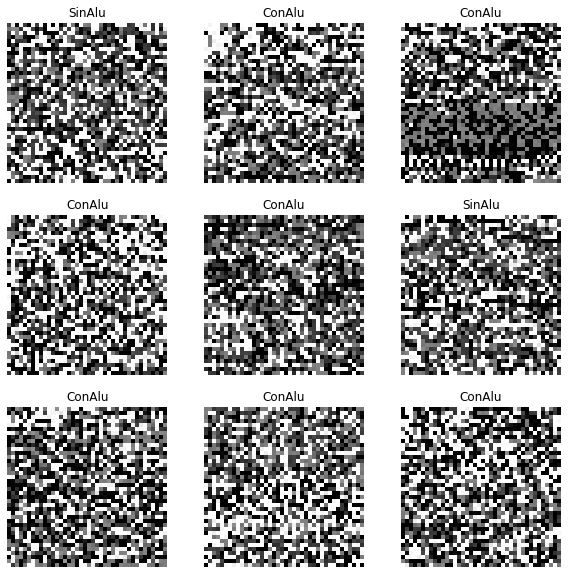

In [10]:
!pip install matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in Train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"),cmap='gray', vmin=0, vmax=255)
        plt.title(classes[labels[i]])
        plt.axis("off")


In [11]:
import numpy as np
import pandas as pd

#from skimage.io import imread
import imread
# from skimage.transform import resize
#!pip install resize

# import resize
import tensorflow as tf
# from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
print(tf.test.gpu_device_name())
print("?")
#config = tf.compat.v1.ConfigProto() 
#config.gpu_options.per_process_gpu_memory_fraction = 0.9
#tf.keras.backend.tensorflow_backend.set_session(tf.Session(config=config))
#gpu_devices = tf.config.experimental.list_physical_devices('GPU')
#for device in gpu_devices:
#    tf.config.experimental.set_memory_growth(device, True)


from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten,  Rescaling
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical

Num GPUs Available:  1
Physical devices cannot be modified after being initialized
/device:GPU:0
?


2021-10-31 13:39:39.692579: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 13:39:39.692875: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 13:39:39.693059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 13:39:39.693291: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 13:39:39.693473: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [11]:
import tensorflow as tf
tf.test.gpu_device_name()

2021-10-20 20:28:34.492528: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-20 20:28:34.493352: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-20 20:28:34.493914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-20 20:28:34.494519: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-20 20:28:34.494952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

'/device:GPU:0'

In [12]:
Train= Train.prefetch(buffer_size=64)
Val= Val.prefetch(buffer_size=64)

In [13]:
model = Sequential()
model.add(Rescaling(1./255,input_shape=(40,40,1)))
model.add(Conv2D(filters = 64, kernel_size = (2,2), activation ='relu',input_shape=(40,40,1)))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 64, kernel_size = (2,2), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3 ))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (2,2), activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256, kernel_size = (2,2), activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(60, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid")) #Classification layer or output layer

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 40, 40, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 39, 39, 64)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 39, 39, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 64)        16448     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 19, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 19, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 19, 19, 64)        0

In [15]:
epocas=50


In [16]:
evolucionEntrenamiento = model.fit(Train, validation_data = Val, epochs= epocas)

Epoch 1/50


2021-10-20 20:31:01.081020: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2021-10-20 20:31:02.294552: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-10-20 20:31:03.586821: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


14187/14187 [==============================] - 381s 27ms/step - loss: 0.3581 - accuracy: 0.8353 - val_loss: 0.3168 - val_accuracy: 0.8564
Epoch 2/50
14187/14187 [==============================] - 372s 26ms/step - loss: 0.3116 - accuracy: 0.8621 - val_loss: 0.2896 - val_accuracy: 0.8714
Epoch 3/50
14187/14187 [==============================] - 371s 26ms/step - loss: 0.2985 - accuracy: 0.8688 - val_loss: 0.2815 - val_accuracy: 0.8753
Epoch 4/50
14187/14187 [==============================] - 363s 26ms/step - loss: 0.2897 - accuracy: 0.8735 - val_loss: 0.2699 - val_accuracy: 0.8815
Epoch 5/50
14187/14187 [==============================] - 360s 25ms/step - loss: 0.2821 - accuracy: 0.8773 - val_loss: 0.2674 - val_accuracy: 0.8831
Epoch 6/50
14187/14187 [==============================] - 363s 26ms/step - loss: 0.2756 - accuracy: 0.8804 - val_loss: 0.2580 - val_accuracy: 0.8878
Epoch 7/50
14187/14187 [==============================] - 364s 26ms/step - loss: 0.2705 - accuracy: 0.8829 - val_loss

In [17]:
model.save("20211021")

2021-10-21 05:40:21.031921: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: 20211021/assets


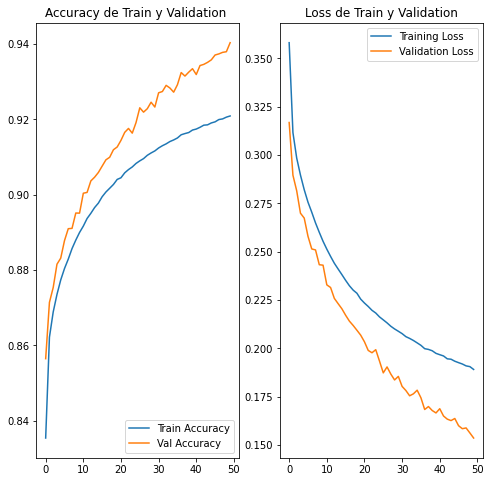

In [18]:
acc = evolucionEntrenamiento.history['accuracy']
val_acc = evolucionEntrenamiento.history['val_accuracy']

loss = evolucionEntrenamiento.history['loss']
val_loss = evolucionEntrenamiento.history['val_loss']

epochs_range = range(epocas)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss de Train y Validation')
plt.show()


In [19]:
from keras.models import Sequential, Model, load_model # , evaluate, predict
score = model.evaluate(Test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


3115/3115 [==============================] - 21s 7ms/step - loss: 0.2647 - accuracy: 0.8984
Test loss: 0.2646593749523163 / Test accuracy: 0.8984410762786865


In [20]:
score=model.predict(Test)


In [21]:
print(score)
display(score)

[[4.3838638e-05]
 [9.9720591e-01]
 [1.3999388e-01]
 ...
 [5.5208193e-07]
 [8.9427787e-01]
 [1.4943213e-05]]


array([[4.3838638e-05],
       [9.9720591e-01],
       [1.3999388e-01],
       ...,
       [5.5208193e-07],
       [8.9427787e-01],
       [1.4943213e-05]], dtype=float32)

In [22]:
evolucionEntrenammiento_Plus50 = model.fit(Train, validation_data = Val, epochs= 50)

Epoch 1/50
14187/14187 [==============================] - 375s 26ms/step - loss: 0.1891 - accuracy: 0.9210 - val_loss: 0.1608 - val_accuracy: 0.9363
Epoch 2/50
14187/14187 [==============================] - 368s 26ms/step - loss: 0.1877 - accuracy: 0.9215 - val_loss: 0.1523 - val_accuracy: 0.9413
Epoch 3/50
14187/14187 [==============================] - 362s 26ms/step - loss: 0.1877 - accuracy: 0.9219 - val_loss: 0.1512 - val_accuracy: 0.9412
Epoch 4/50
14187/14187 [==============================] - 363s 26ms/step - loss: 0.1870 - accuracy: 0.9221 - val_loss: 0.1537 - val_accuracy: 0.9408
Epoch 5/50
14187/14187 [==============================] - 361s 25ms/step - loss: 0.1861 - accuracy: 0.9225 - val_loss: 0.1512 - val_accuracy: 0.9420
Epoch 6/50
14187/14187 [==============================] - 361s 25ms/step - loss: 0.1857 - accuracy: 0.9226 - val_loss: 0.1506 - val_accuracy: 0.9420
Epoch 7/50
14187/14187 [==============================] - 361s 25ms/step - loss: 0.1855 - accuracy: 0.9227

In [23]:
model.save("20211022")

INFO:tensorflow:Assets written to: 20211022/assets


In [26]:
from keras.models import Sequential, Model, load_model # , evaluate, predict
score = model.evaluate(Test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
score=model.predict(Test)


3115/3115 [==============================] - 21s 7ms/step - loss: 0.2725 - accuracy: 0.8951
Test loss: 0.272504985332489 / Test accuracy: 0.8950918912887573


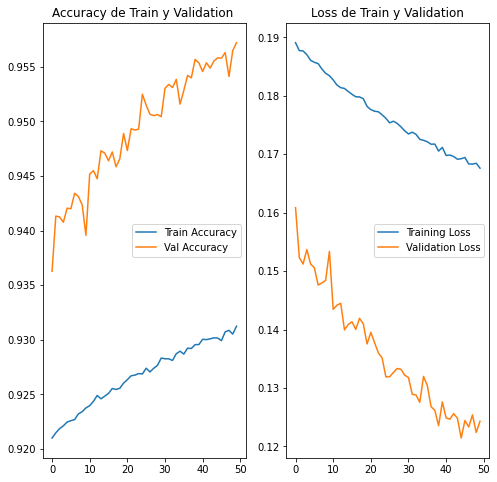

In [25]:
acc = evolucionEntrenammiento_Plus50.history['accuracy']
val_acc = evolucionEntrenammiento_Plus50.history['val_accuracy']

loss = evolucionEntrenammiento_Plus50.history['loss']
val_loss = evolucionEntrenammiento_Plus50.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='center right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='center right')
plt.title('Loss de Train y Validation')
plt.show()


In [27]:
evolucionEntrenammiento_Plus100 = model.fit(Train, validation_data = Val, epochs= 50)

Epoch 1/50
14187/14187 [==============================] - 377s 27ms/step - loss: 0.1676 - accuracy: 0.9309 - val_loss: 0.1220 - val_accuracy: 0.9569
Epoch 2/50
14187/14187 [==============================] - 362s 26ms/step - loss: 0.1672 - accuracy: 0.9313 - val_loss: 0.1199 - val_accuracy: 0.9573
Epoch 3/50
14187/14187 [==============================] - 362s 25ms/step - loss: 0.1674 - accuracy: 0.9311 - val_loss: 0.1188 - val_accuracy: 0.9574
Epoch 4/50
14187/14187 [==============================] - 361s 25ms/step - loss: 0.1667 - accuracy: 0.9311 - val_loss: 0.1214 - val_accuracy: 0.9565
Epoch 5/50
14187/14187 [==============================] - 362s 25ms/step - loss: 0.1668 - accuracy: 0.9314 - val_loss: 0.1211 - val_accuracy: 0.9565
Epoch 6/50
14187/14187 [==============================] - 363s 26ms/step - loss: 0.1660 - accuracy: 0.9317 - val_loss: 0.1185 - val_accuracy: 0.9588
Epoch 7/50
14187/14187 [==============================] - 363s 26ms/step - loss: 0.1661 - accuracy: 0.9317

In [28]:
model.save("20211023")

acc = evolucionEntrenammiento_Plus100.history['accuracy']
val_acc = evolucionEntrenammiento_Plus100.history['val_accuracy']

loss = evolucionEntrenammiento_Plus100.history['loss']
val_loss = evolucionEntrenammiento_Plus100.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='center right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='center right')
plt.title('Loss de Train y Validation')
plt.show()


INFO:tensorflow:Assets written to: 20211023/assets


In [30]:
from keras.models import Sequential, Model, load_model # , evaluate, predict
score = model.evaluate(Test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
score=model.predict(Test)

3115/3115 [==============================] - 22s 7ms/step - loss: 0.2981 - accuracy: 0.8942
Test loss: 0.2981015741825104 / Test accuracy: 0.8941887617111206


In [31]:
evolucionEntrenammiento_Plus150 = model.fit(Train, validation_data = Val, epochs= 50)

Epoch 1/50
14187/14187 [==============================] - 378s 27ms/step - loss: 0.1568 - accuracy: 0.9359 - val_loss: 0.1090 - val_accuracy: 0.9634
Epoch 2/50
14187/14187 [==============================] - 367s 26ms/step - loss: 0.1570 - accuracy: 0.9359 - val_loss: 0.1072 - val_accuracy: 0.9653
Epoch 3/50
14187/14187 [==============================] - 361s 25ms/step - loss: 0.1566 - accuracy: 0.9361 - val_loss: 0.1046 - val_accuracy: 0.9651
Epoch 4/50
14187/14187 [==============================] - 361s 25ms/step - loss: 0.1566 - accuracy: 0.9362 - val_loss: 0.1036 - val_accuracy: 0.9660
Epoch 5/50
14187/14187 [==============================] - 361s 25ms/step - loss: 0.1564 - accuracy: 0.9361 - val_loss: 0.1036 - val_accuracy: 0.9657
Epoch 6/50
14187/14187 [==============================] - 361s 25ms/step - loss: 0.1564 - accuracy: 0.9363 - val_loss: 0.1047 - val_accuracy: 0.9653
Epoch 7/50
14187/14187 [==============================] - 361s 25ms/step - loss: 0.1554 - accuracy: 0.9365

INFO:tensorflow:Assets written to: 20211024/assets


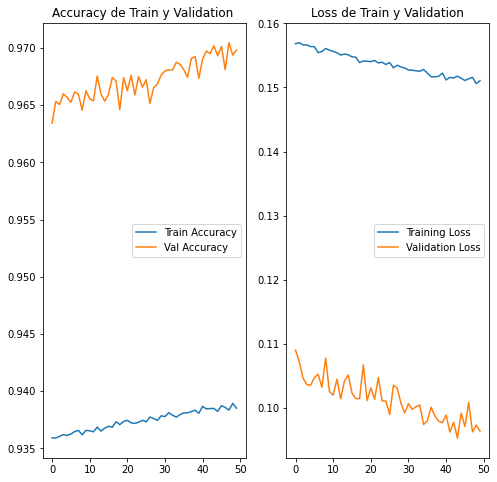

In [32]:
model.save("20211024")

acc = evolucionEntrenammiento_Plus150.history['accuracy']
val_acc = evolucionEntrenammiento_Plus150.history['val_accuracy']

loss = evolucionEntrenammiento_Plus150.history['loss']
val_loss = evolucionEntrenammiento_Plus150.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='center right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='center right')
plt.title('Loss de Train y Validation')
plt.show()

In [33]:
from keras.models import Sequential, Model, load_model # , evaluate, predict
score = model.evaluate(Test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
score=model.predict(Test)


3115/3115 [==============================] - 21s 7ms/step - loss: 0.2933 - accuracy: 0.8943
Test loss: 0.2933112382888794 / Test accuracy: 0.894286572933197


In [34]:
evolucionEntrenammiento_Plus200 = model.fit(Train, validation_data = Val, epochs= 50)

Epoch 1/50
14187/14187 [==============================] - 360s 25ms/step - loss: 0.1507 - accuracy: 0.9389 - val_loss: 0.0936 - val_accuracy: 0.9702
Epoch 2/50
14187/14187 [==============================] - 360s 25ms/step - loss: 0.1503 - accuracy: 0.9389 - val_loss: 0.0944 - val_accuracy: 0.9704
Epoch 3/50
14187/14187 [==============================] - 360s 25ms/step - loss: 0.1503 - accuracy: 0.9390 - val_loss: 0.0953 - val_accuracy: 0.9703
Epoch 4/50
14187/14187 [==============================] - 360s 25ms/step - loss: 0.1504 - accuracy: 0.9389 - val_loss: 0.0979 - val_accuracy: 0.9688
Epoch 5/50
14187/14187 [==============================] - 361s 25ms/step - loss: 0.1507 - accuracy: 0.9388 - val_loss: 0.0964 - val_accuracy: 0.9690
Epoch 6/50
14187/14187 [==============================] - 361s 25ms/step - loss: 0.1503 - accuracy: 0.9391 - val_loss: 0.0935 - val_accuracy: 0.9705
Epoch 7/50
14187/14187 [==============================] - 360s 25ms/step - loss: 0.1500 - accuracy: 0.9392

INFO:tensorflow:Assets written to: 20211024/assets


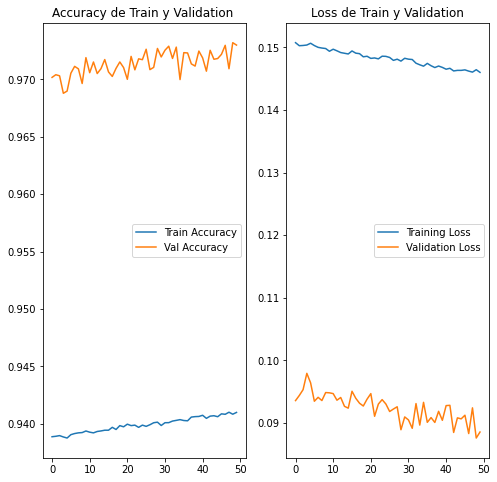

In [35]:
model.save("20211025")

acc = evolucionEntrenammiento_Plus200.history['accuracy']
val_acc = evolucionEntrenammiento_Plus200.history['val_accuracy']

loss = evolucionEntrenammiento_Plus200.history['loss']
val_loss = evolucionEntrenammiento_Plus200.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='center right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='center right')
plt.title('Loss de Train y Validation')
plt.show()

In [36]:
from keras.models import Sequential, Model, load_model # , evaluate, predict
score = model.evaluate(Test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
score=model.predict(Test)

3115/3115 [==============================] - 21s 7ms/step - loss: 0.3018 - accuracy: 0.8939
Test loss: 0.3018261194229126 / Test accuracy: 0.8939253091812134


In [ ]:
evolucionEntrenammiento_Plus250 = model.fit(Train, validation_data = Val, epochs= 50)

In [ ]:
score = model.evaluate(Test,batch_size=128)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')